In [247]:
import numpy as np
import pandas as pd

import seaborn as sns

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [233]:
pd.set_option("display.max_columns", None)

In [234]:
df = pd.read_csv("../../data/processed/data_train_model.csv")

In [235]:
alcohol = ['Alcohol']

nicotine = ['Nicotine']

illegal_drugs1 = ['Cannabis', 'Legalh', 'LSD', 'Shrooms', 
                  'Amphet', 'Amyl', 'Ecstasy', 'Ketamine', 
                  'Coke']

illegal_drugs2 = ['Meth', 'Benzos', 'Heroin', 'Crack']

<AxesSubplot:>

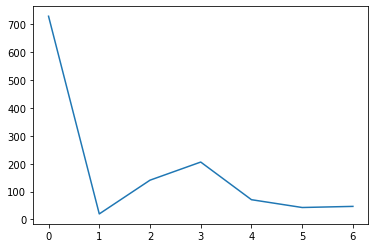

In [277]:
df.Legalh.value_counts().sort_index().plot()

In [236]:
df['Alcohol_bin'] = [1 if alc >= 5 else 0 for alc in df.Alcohol.values]

In [298]:
borders = [5, 4, 4, 4, 4, 4, 4, 3, 4]
drug_zip = list(zip(borders, illegal_drugs1))
drug_zip

[(5, 'Cannabis'),
 (4, 'Legalh'),
 (4, 'LSD'),
 (4, 'Shrooms'),
 (4, 'Amphet'),
 (4, 'Amyl'),
 (4, 'Ecstasy'),
 (3, 'Ketamine'),
 (4, 'Coke')]

In [299]:
for b, drug in zip(borders, illegal_drugs1):
    df[drug+'_bin'] = [1 if d > b else 0 for d in df[drug].values]

In [300]:
df.iloc[:, -9:].sum(axis=0)

Legalh_bin          90
LSD_bin             44
Shrooms_bin         30
Amphet_bin         102
Amyl_bin            11
Ecstasy_bin         64
Ketamine_bin        52
Coke_bin            36
illegal_drugs_1    457
dtype: int64

In [301]:
df['illegal_drugs_1'] = df.iloc[:, -9:].sum(axis=1)

In [302]:
df['illegal_drugs_1'] = [1 if ill > 0 else 0 for ill in df.illegal_drugs_1.values]
df.illegal_drugs_1.value_counts()

0    794
1    463
Name: illegal_drugs_1, dtype: int64

In [237]:
X = df.iloc[:, :12]

In [238]:
y = df.Alcohol_bin

# Models
- Naive Bayes
- Decision Tree
- Random Forests
- KNN
- Logreg
- SVM
- Assemble Methods (AdaBoost, XGBoost)

# Naive Bayes - Baseline

In [239]:
clf = GaussianNB()
#clf.fit(X, y)

In [243]:
f1_score = cross_val_score(clf, X, y, scoring='f1')
print(f1_score)

[0.76530612 0.76092545 0.75590551 0.79800499 0.78696742]


In [218]:
y_pred_NB_alc = cross_val_predict(clf,X, y, cv=5)

In [219]:
print(classification_report(y, y_pred_NB_alc))
print(confusion_matrix(y, y_pred_NB_alc))

              precision    recall  f1-score   support

           0       0.39      0.13      0.20       415
           1       0.68      0.90      0.77       842

    accuracy                           0.65      1257
   macro avg       0.54      0.52      0.48      1257
weighted avg       0.58      0.65      0.58      1257

[[ 54 361]
 [ 83 759]]


## SMOTE Naive Bayes

In [221]:
df.Alcohol_bin.value_counts()/df.shape[0]

1    0.669849
0    0.330151
Name: Alcohol_bin, dtype: float64

In [222]:
Counter(y)

Counter({0: 415, 1: 842})

In [224]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [225]:
clf = GaussianNB()

In [226]:
y_pred_NB_alc_smote = cross_val_predict(clf,X_smote, y_smote, cv=5)

In [227]:
print(classification_report(y_smote, y_pred_NB_alc_smote))
print(confusion_matrix(y_smote, y_pred_NB_alc_smote))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       842
           1       0.57      0.53      0.55       842

    accuracy                           0.56      1684
   macro avg       0.56      0.56      0.56      1684
weighted avg       0.56      0.56      0.56      1684

[[502 340]
 [399 443]]


# Decision Tree

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       842
           1       0.67      0.67      0.67       842

    accuracy                           0.67      1684
   macro avg       0.67      0.67      0.67      1684
weighted avg       0.67      0.67      0.67      1684



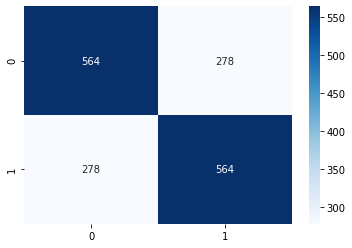

In [253]:
dtree = DecisionTreeClassifier(max_depth=10)
y_pred = cross_val_predict(dtree, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
sns.heatmap(cm, annot=True,
            cmap='Blues', fmt='.0f');

# Random Forest

In [ ]:
rnc = RandomForestClassifier(n_estimators = 200, random_state=10, class_weight="balanced")

# Logistische Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver="liblinear")

#  KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

# Support Vector Machines

In [ ]:
svm = svm.SVC(kernel='rbf')

In [105]:
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

#Define Parameters
parameters_DT = {'max_depth': np.arange(1, 101, 1),             
             } 

classifieres = [clf_A]

In [106]:
def train_predict(clf, parameters, drugs, X, y,cv=5):
    results = {}
    # Choose the clf and define paramters
  
    #Make the scorer
    scores = [
        'precision', 
        'recall', 
       # 'accuracy', 
        'f1', 
       # 'roc_auc'
    ]
    
    # Perform GridSearch
    best_scores = {}
    best_param = {}
    #best_model = {}
    for d in drugs:
        #X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.2, random_state=1, stratify=df[y])
        grid = GridSearchCV(estimator=clf, param_grid=parameters, 
                            cv=cv, scoring=scores, refit='recall')
        grid_fit = grid.fit(X,y[d]) 
        best_scores[d] = {}
        best_scores[d]['recall'] = max(grid_fit.cv_results_['mean_test_recall'])
        best_scores[d]['precision'] = max(grid_fit.cv_results_['mean_test_precision'])
        best_param[d] = grid_fit.best_params_
        best_clf = grid_fit.best_estimator_ 
        
    return best_scores, best_param

In [107]:
best_scores, best_param = train_predict(clf_A, parameters_DT, 
                                        ['Alcohol_bin', 'Meth_bin'], X, y,cv=4)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
best_scores

{'Alcohol_bin': {'recall': 0.9944812362030905, 'precision': 0.965553045632532},
 'Meth_bin': {'recall': 0.5969940253920836, 'precision': 0.5957954482515334}}

In [104]:
best_param

{'Alcohol_bin': {'max_depth': 2}, 'Meth_bin': {'max_depth': 2}}